In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import numpy as np

In [21]:
# Load training data
train_df = pd.read_csv('./Data/training_data.csv')
test_df = pd.read_csv('./Data/testing_data.csv')

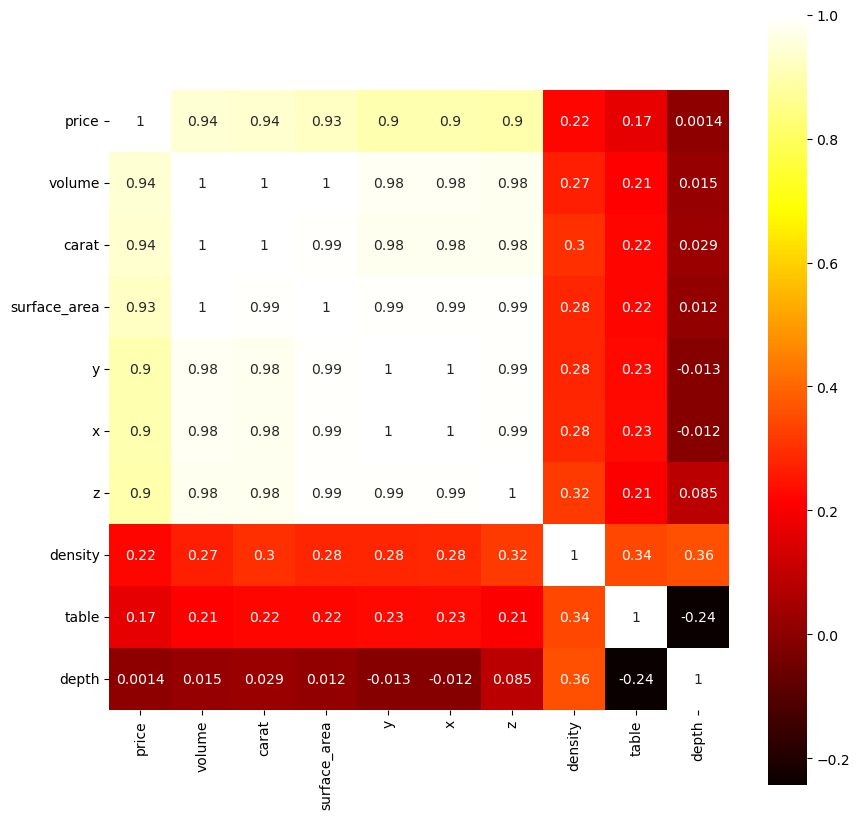

In [22]:
train_df_copy = train_df.copy()
train_df_copy['price'] = train_df['price']

correlation_matrix = train_df_copy.corr()

# Get columns of top 10 most correlated parameters
cols = correlation_matrix.nlargest(10, ['price'])['price'].index

# Compute pearson correlation coefficient
cm = np.corrcoef(train_df_copy[cols].values.T)

# Plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='hot', cbar=True, square=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
# Various hyper-parameters to tune
reg = XGBRegressor(n_estimators=1500, 
                   max_depth=5, 
                   learning_rate = 0.02, 
                   min_child_weight= 4,
                   subsample = 0.7,
                   objective='reg:squarederror')

In [25]:
train_y = train_df_copy['price']
train_X = train_df_copy.drop(columns=['price'])

# We also want to split data for evaluation
train_X_s, test_X, train_y_s, test_y = train_test_split(train_X, train_y, test_size=0.3)

# Fit model
reg.fit(train_X, train_y, eval_set = [(train_X_s, train_y_s), (test_X, test_y)], verbose=100)

[0]	validation_0-rmse:5543.99884	validation_1-rmse:5545.80566
[100]	validation_0-rmse:1009.63517	validation_1-rmse:1006.58359
[200]	validation_0-rmse:615.13109	validation_1-rmse:612.32753
[300]	validation_0-rmse:579.79612	validation_1-rmse:577.19101
[400]	validation_0-rmse:568.16952	validation_1-rmse:565.95862
[500]	validation_0-rmse:561.15159	validation_1-rmse:558.93971
[600]	validation_0-rmse:556.11014	validation_1-rmse:554.38526
[700]	validation_0-rmse:551.77835	validation_1-rmse:550.25295
[800]	validation_0-rmse:547.84821	validation_1-rmse:546.47955
[900]	validation_0-rmse:544.34416	validation_1-rmse:543.23970
[1000]	validation_0-rmse:540.87936	validation_1-rmse:540.00089
[1100]	validation_0-rmse:537.64420	validation_1-rmse:536.99901
[1200]	validation_0-rmse:534.58363	validation_1-rmse:533.99363
[1300]	validation_0-rmse:531.73282	validation_1-rmse:531.47349
[1400]	validation_0-rmse:528.89275	validation_1-rmse:528.69581
[1499]	validation_0-rmse:526.32615	validation_1-rmse:526.12346


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

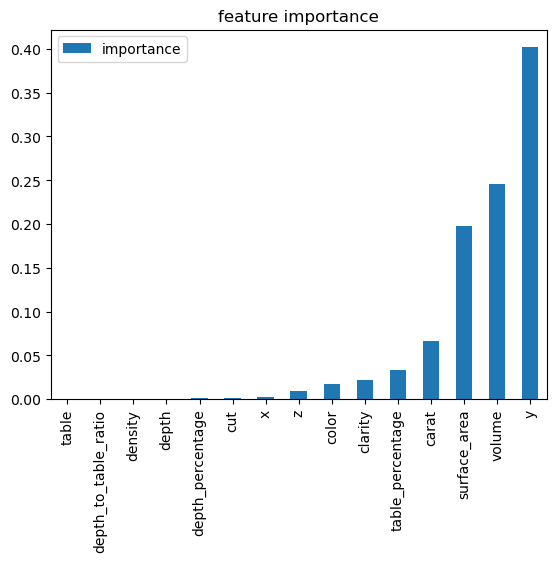

In [27]:
# Let's look at the feature importances
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])

fi.sort_values('importance').plot(kind='bar', title='feature importance')
plt.show()

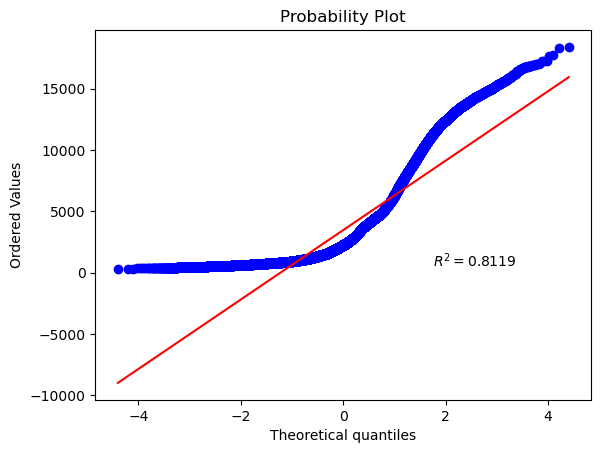

In [28]:
# Now make predictions 
test_y = reg.predict(test_df)

# Let's take a look this data
stats.probplot(test_y, plot=plt, rvalue=True)

plt.show()

In [30]:
# Load submission df to replace
submission_df = pd.read_csv('./Data/sample_submission.csv', index_col='id')
submission_df['price'] = test_y

# create submission
submission_df.to_csv('./Data/submission_xgboost.csv')

,price
id,
193573,862.613831
193574,2566.242676
193575,2391.875000
193576,867.648132
193577,5809.627930
